# New York City Taxi Trip Duration Prediction

This project aims to predict the duration of the trip. Trip duration is predicted based on pick-up and drop-off datetime, pick-up and drop-off coordinates, number of passengers, vendors, and how the data record. Data source: https://www.kaggle.com/competitions/nyc-taxi-trip-duration/data

## Preparation

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [3]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

https://www.kaggle.com/competitions/nyc-taxi-trip-duration

### Load dataset

In [4]:
df= pd.read_csv('/content/Drive/MyDrive/dibimbing/Special Class 6/HW_data/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [4]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


### Correcting data type

In [5]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [6]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': 1, 'N': 0})

In [7]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['date'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

## Data Cleaning

### Handling Missing Value

In [8]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
year                  0
month                 0
date                  0
hour                  0
dtype: int64

### Handling Duplicated Value

In [9]:
df.duplicated().sum()

0

## Data Understanding

In [8]:
df = df.drop(['id', 'pickup_datetime', 'dropoff_datetime'], axis=1)

### Multicollinearity Check

<AxesSubplot:>

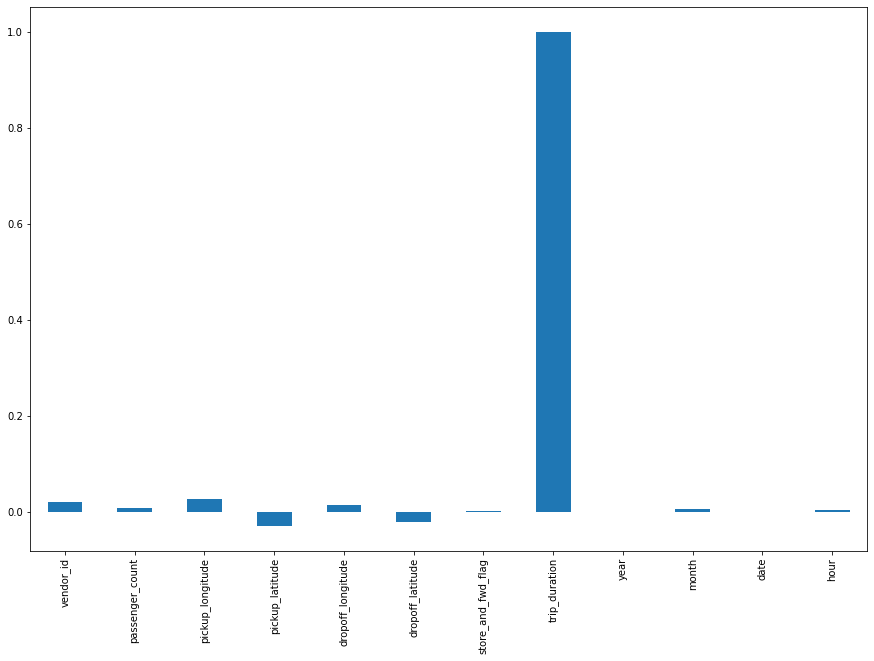

In [ ]:
df.corr()['trip_duration'].plot(kind='bar', figsize = (15, 10))

### Seasonal Analysis

#### Year

In [11]:
year = df.groupby(['year']).agg(
              number_of_order = ('id', 'nunique')).sort_values(
                ['year'], ascending=True).reset_index()
year.head()

KeyError: ignored

#### Month

In [ ]:
month = df.groupby(['month']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['month'], ascending=True).reset_index()
month

,month,number_of_order,trip_duration
0,1,229707,922.373319
1,2,238300,920.830453
2,3,256189,937.365363
3,4,251645,962.891462
4,5,248487,999.450555
5,6,234316,1013.367226


<Axes: xlabel='month', ylabel='number_of_order'>

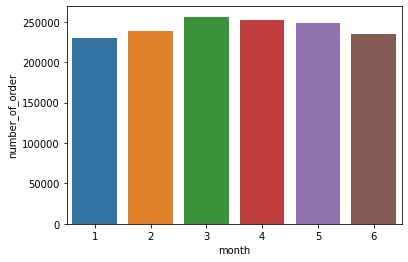

In [ ]:
sns.barplot(x='month', y='number_of_order', data=month)

<Axes: xlabel='month', ylabel='trip_duration'>

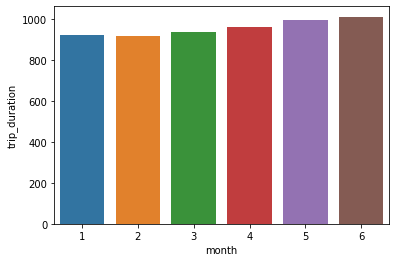

In [ ]:
sns.barplot(x='month', y='trip_duration', data=month)

#### Date

In [ ]:
date = df.groupby(['date']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['date'], ascending=True).reset_index()
date.head()

,date,number_of_order,trip_duration
0,1,46612,958.053978
1,2,47752,928.860299
2,3,47945,976.247221
3,4,49655,947.549451
4,5,50176,1020.272899


<Axes: xlabel='date', ylabel='number_of_order'>

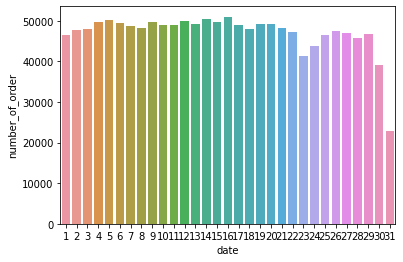

In [ ]:
sns.barplot(x='date', y='number_of_order', data=date)

<Axes: xlabel='date', ylabel='trip_duration'>

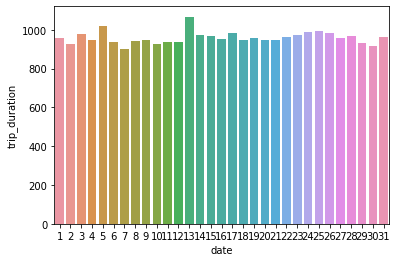

In [ ]:
sns.barplot(x='date', y='trip_duration', data=date)

#### Day

In [ ]:
day = df.groupby(['day']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['day'], ascending=True).reset_index()

weekdays = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
day['day'] = pd.Categorical(day['day'], categories=weekdays, ordered=True)
day = day.sort_values('day')

day.head()

,day,number_of_order,trip_duration
3,Sunday,195366,901.639395
1,Monday,187418,897.947839
5,Tuesday,202749,983.463124
6,Wednesday,210136,975.450494
4,Thursday,218574,1006.528654


<Axes: xlabel='day', ylabel='number_of_order'>

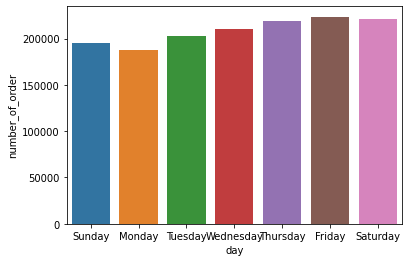

In [ ]:
sns.barplot(x='day', y='number_of_order', data=day)

<Axes: xlabel='day', ylabel='trip_duration'>

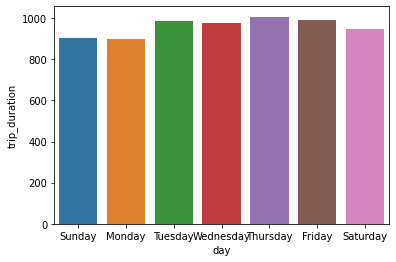

In [ ]:
sns.barplot(x='day', y='trip_duration', data=day)

#### Hour

In [ ]:
hour = df.groupby(['hour']).agg(
              number_of_order = ('id', 'nunique'),
              trip_duration = ('trip_duration', 'mean')).sort_values(
                ['hour'], ascending=True).reset_index()
hour.head()

,hour,number_of_order,trip_duration
0,0,53248,936.657302
1,1,38571,903.087112
2,2,27972,890.076934
3,3,20895,890.070878
4,4,15792,921.976444


<Axes: xlabel='hour', ylabel='number_of_order'>

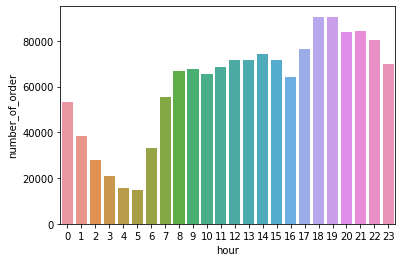

In [ ]:
sns.barplot(x='hour', y='number_of_order', data=hour)

<Axes: xlabel='hour', ylabel='trip_duration'>

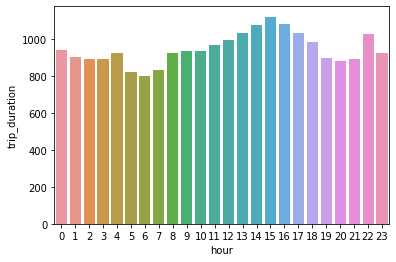

In [ ]:
sns.barplot(x='hour', y='trip_duration', data=hour)

Tidak ada perbedaan yang signifikan dari jenis bulan, tanggal, hari, dan jam

## Data Modeling

In [9]:
def modeling(df, list_model):
  
  X = df.drop('trip_duration', axis=1)
  y = df[['trip_duration']]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  
  result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

  feature = X_train.copy()
  X_train = X_train.to_numpy()
  y_train = y_train.to_numpy()
  y_train = y_train.reshape(len(y_train),)

  for model in list_model:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_train)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
      MAE = mean_absolute_error(y_train, y_pred)
      MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
      result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

      y_pred = model.predict(X_test)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
      MAE = mean_absolute_error(y_test, y_pred)
      MAPE = mean_absolute_percentage_error(y_test, y_pred)

      result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

  print(result)

In [11]:
list_model = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
    ]

## Model Improvement

### Handling Outlier

In [ ]:
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

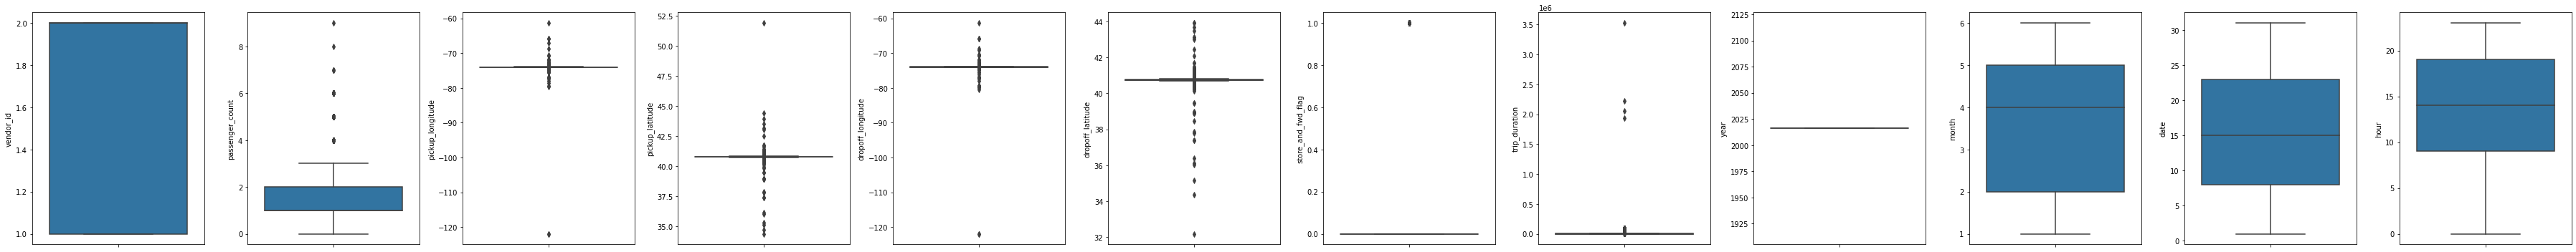

In [ ]:
fig, ax = plt.subplots(1,len(numerical), figsize = (50,5))

for i in range(0, len(numerical)): 
  sns.boxplot(y = df[numerical[i]], ax = ax[i])

plt.tight_layout();
plt.show();

In [14]:
def remove_outlier(data, column):
  for i in column:
    q75 = np.percentile(data[i], 75)
    q25 = np.percentile(data[i], 25)
    intr_qr = q75-q25
    
    max = q75+(1.5*intr_qr)      
    min = q25-(1.5*intr_qr)

    print('min: ', min, 'max: ',max)
    data = data[((data[i]>= min) & (data[i] <= max))]

  return data 
  

#### Number of Passenger

In [ ]:
column = ['passenger_count']

df_outlier_passenger = remove_outlier(df, column).reset_index()

min:  -0.5 max:  3.5


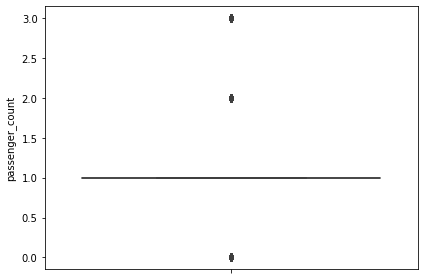

In [ ]:
sns.boxplot(y = df_outlier_passenger['passenger_count'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_passenger, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.7669e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ced

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5912.278637  598.215545  1.619661
1    Test       LinearRegression  2993.638560  587.800152  1.624987
2   Train                  Ridge  5912.278638  598.217046  1.619641
3    Test                  Ridge  2993.638708  587.801814  1.624968
4   Train                  Lasso  5912.525683  599.177600  1.613528
5    Test                  Lasso  2993.999082  588.810090  1.618936
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  5901.641030  530.710965  0.842562


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_passenger = remove_outlier(df_outlier_passenger, column).reset_index()

min:  1.0 max:  1.0


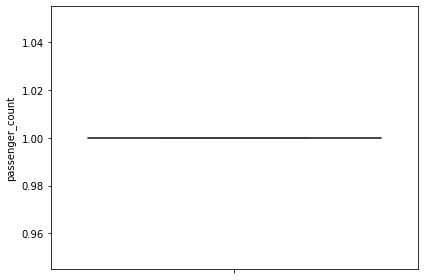

In [ ]:
sns.boxplot(y = df_outlier_passenger['passenger_count'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_passenger, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.84433e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method          RMSE         MAE      MAPE
0   Train       LinearRegression   5975.496464  561.533464  1.740820
1    Test       LinearRegression   2926.339788  554.611498  1.705769
2   Train                  Ridge   5975.496468  561.541924  1.740725
3    Test                  Ridge   2926.337734  554.620080  1.705692
4   Train                  Lasso   5975.704537  565.413556  1.718321
5    Test                  Lasso   2926.407108  558.502780  1.687082
6   Train  DecisionTreeRegressor      0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  13447.093762  547.007284  0.909855


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Number of Pickup Longitude

In [ ]:
column = ['pickup_longitude']

df_outlier_plong = remove_outlier(df, column).reset_index()

min:  -74.02867126464847 max:  -73.93052673339841


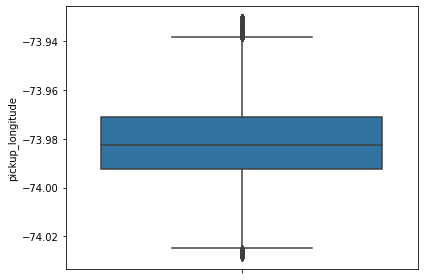

In [ ]:
sns.boxplot(y = df_outlier_plong['pickup_longitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_plong, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.4684e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ced

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  3852.250671  534.887920  1.289446
1    Test       LinearRegression  3053.177823  524.219285  1.272815
2   Train                  Ridge  3852.250711  534.889066  1.289603
3    Test                  Ridge  3053.178804  524.218863  1.272971
4   Train                  Lasso  3853.096254  539.297764  1.318631
5    Test                  Lasso  3054.463525  528.365910  1.301978
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  4584.260037  523.320553  0.829411


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_plong = remove_outlier(df_outlier_plong, column).reset_index()

min:  -74.02500152587893 max:  -73.93833160400388


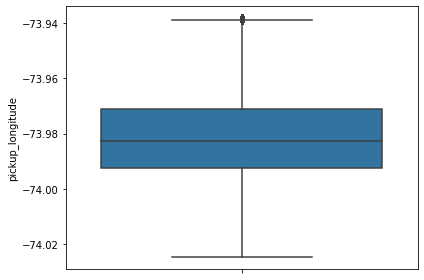

In [ ]:
sns.boxplot(y = df_outlier_plong['pickup_longitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_plong, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.82704e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  3833.872860  531.404739  1.267149
1    Test       LinearRegression  3118.575775  527.140037  1.259800
2   Train                  Ridge  3833.872898  531.407410  1.267283
3    Test                  Ridge  3118.578701  527.141886  1.259955
4   Train                  Lasso  3834.702420  535.777547  1.293566
5    Test                  Lasso  3120.010597  531.608210  1.287104
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  4595.051220  525.769933  0.803791


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_plong = remove_outlier(df_outlier_plong, column)

min:  -74.02479171752927 max:  -73.9388236999512


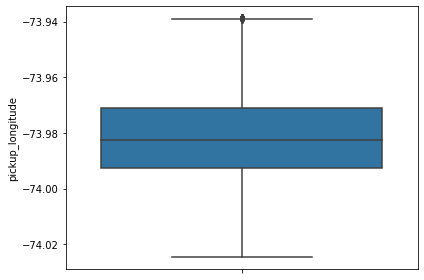

In [ ]:
sns.boxplot(y = df_outlier_plong['pickup_longitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_plong, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.82836e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e4

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  3833.172334  530.838491  1.260982
1    Test       LinearRegression  3119.879916  526.666617  1.256499
2   Train                  Ridge  3833.172381  530.833225  1.261135
3    Test                  Ridge  3119.871699  526.661642  1.256653
4   Train                  Lasso  3834.070958  534.416550  1.288544
5    Test                  Lasso  3119.826445  530.157843  1.283989
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  4674.731562  534.142574  0.881306


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Number of Pickup Latitude

In [ ]:
column = ['pickup_latitude']

df_outlier_plat = remove_outlier(df, column).reset_index()

min:  40.69082641601564 max:  40.814880371093736


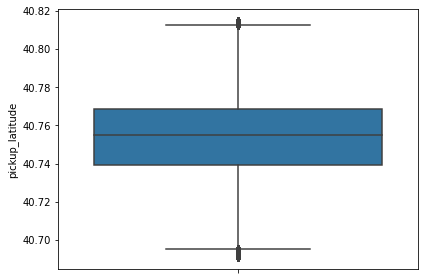

In [ ]:
sns.boxplot(y = df_outlier_plat['pickup_latitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_plat, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.34217e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  4322.470546  559.670069  1.378157
1    Test       LinearRegression  3083.320659  549.567987  1.380465
2   Train                  Ridge  4322.470554  559.682183  1.378162
3    Test                  Ridge  3083.321678  549.580321  1.380459
4   Train                  Lasso  4323.057036  564.876138  1.380992
5    Test                  Lasso  3084.340005  554.816475  1.381147
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  6868.691872  545.275757  0.825646


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_plat = remove_outlier(df_outlier_plat, column)

min:  40.69549560546874 max:  40.81246948242187


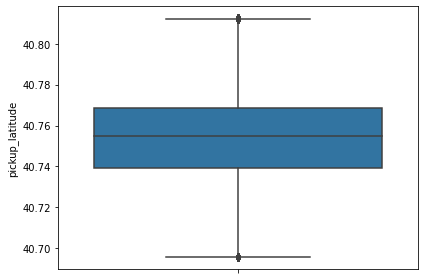

In [ ]:
sns.boxplot(y = df_outlier_plat['pickup_latitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_plat, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.36457e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e4

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  4301.574014  555.114444  1.362761
1    Test       LinearRegression  3181.172619  555.489810  1.366211
2   Train                  Ridge  4301.574023  555.126767  1.362772
3    Test                  Ridge  3181.172456  555.501756  1.366227
4   Train                  Lasso  4302.170066  560.338031  1.366556
5    Test                  Lasso  3181.941779  560.579080  1.371491
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  7120.568444  560.235759  0.863408


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Number of Drop Off Longitude

In [ ]:
column = ['dropoff_longitude']

df_outlier_dlong = remove_outlier(df, column).reset_index()

min:  -74.03379440307617 max:  -73.9205436706543


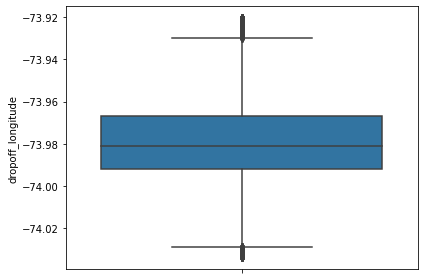

In [ ]:
sns.boxplot(y = df_outlier_dlong['dropoff_longitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dlong, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.44542e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5861.037530  549.920238  1.329700
1    Test       LinearRegression  3029.768022  530.844227  1.309612
2   Train                  Ridge  5861.037536  549.916289  1.329748
3    Test                  Ridge  3029.765704  530.839904  1.309658
4   Train                  Lasso  5861.255465  550.724286  1.340256
5    Test                  Lasso  3029.845289  531.575407  1.319564
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  5901.344609  527.332799  0.814714


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_dlong = remove_outlier(df_outlier_dlong, column)

min:  -74.02896499633789 max:  -73.92963027954102


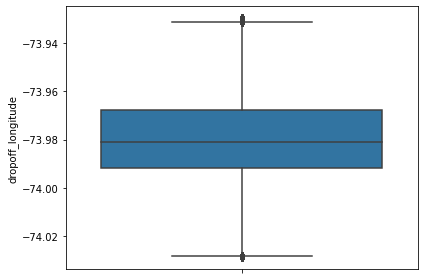

In [ ]:
sns.boxplot(y = df_outlier_dlong['dropoff_longitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dlong, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.49708e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e4

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  4304.953024  534.623280  1.305939
1    Test       LinearRegression  7562.966718  550.886549  1.286336
2   Train                  Ridge  4304.953031  534.625560  1.305988
3    Test                  Ridge  7562.970340  550.888749  1.286383
4   Train                  Lasso  4305.259868  536.296793  1.317883
5    Test                  Lasso  7563.711452  552.584516  1.296260
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  8244.861233  539.907217  0.870400


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Number of Drop Off Latitude

In [ ]:
column = ['dropoff_latitude']

df_outlier_dlat = remove_outlier(df, column).reset_index()

min:  40.684997081756606 max:  40.820697307586656


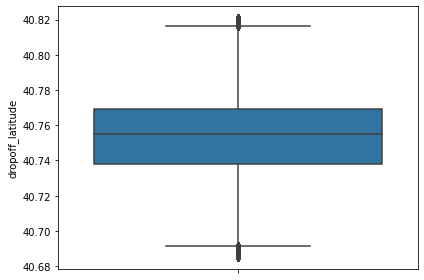

In [ ]:
sns.boxplot(y = df_outlier_dlat['dropoff_latitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dlat, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.42112e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5838.520055  555.357344  1.376072
1    Test       LinearRegression  3164.954055  549.907288  1.356048
2   Train                  Ridge  5838.520061  555.357897  1.376098
3    Test                  Ridge  3164.951402  549.908174  1.356078
4   Train                  Lasso  5838.817257  558.504071  1.385016
5    Test                  Lasso  3165.076675  553.040765  1.365985
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  6825.271358  547.746954  0.800482


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_dlat = remove_outlier(df_outlier_dlat, column)

min:  40.6912784576416 max:  40.816293716430664


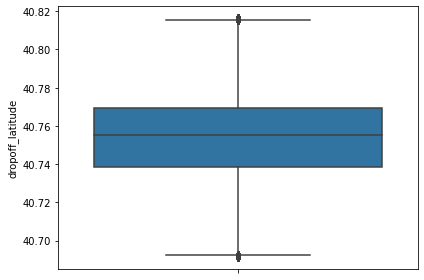

In [ ]:
psns.boxplot(y = df_outlier_dlat['dropoff_latitude'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dlat, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.47798e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e4

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5871.875961  554.550884  1.361101
1    Test       LinearRegression  3082.195725  540.375655  1.388855
2   Train                  Ridge  5871.875966  554.551598  1.361133
3    Test                  Ridge  3082.194208  540.376554  1.388886
4   Train                  Lasso  5872.151742  557.584319  1.370336
5    Test                  Lasso  3082.584018  543.418900  1.397765
6   Train  DecisionTreeRegressor     0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  7560.429521  539.490704  0.855433


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Number of Trip Duration

In [ ]:
column = ['trip_duration']

df_outlier_dur = remove_outlier(df, column).reset_index()

min:  -620.0 max:  2092.0


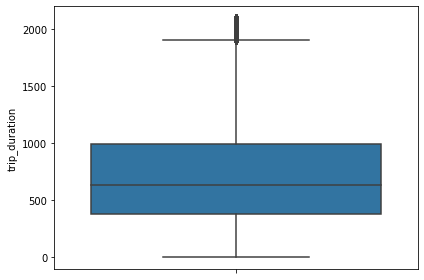

In [ ]:
sns.boxplot(y = df_outlier_dur['trip_duration'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dur, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.42637e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  442.679036  355.357447  1.196400
1    Test       LinearRegression  443.360651  355.609982  1.203078
2   Train                  Ridge  442.679038  355.359369  1.196393
3    Test                  Ridge  443.359425  355.611917  1.203071
4   Train                  Lasso  444.646931  358.187588  1.186863
5    Test                  Lasso  444.707280  358.460905  1.193847
6   Train  DecisionTreeRegressor    0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  328.586618  234.412582  0.519481


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_dur = remove_outlier(df_outlier_dur, column)

min:  -526.5 max:  1901.5


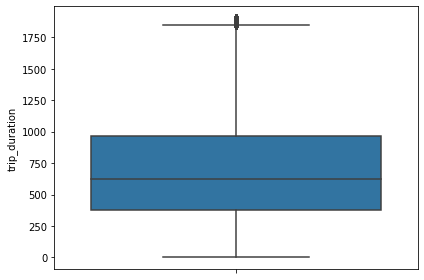

In [ ]:
sns.boxplot(y = df_outlier_dur['trip_duration'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dur, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.5236e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e42

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  415.595567  336.862718  1.171551
1    Test       LinearRegression  419.505680  337.325182  1.156335
2   Train                  Ridge  415.595571  336.865242  1.171544
3    Test                  Ridge  419.501094  337.327673  1.156329
4   Train                  Lasso  417.966546  340.142384  1.160714
5    Test                  Lasso  418.847408  340.599408  1.146373
6   Train  DecisionTreeRegressor    0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  311.488943  224.192478  0.511722


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_dur = remove_outlier(df_outlier_dur, column)

min:  -499.5 max:  1848.5


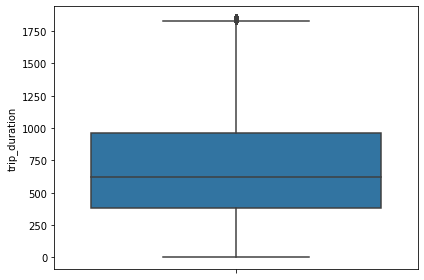

In [ ]:
sns.boxplot(y = df_outlier_dur['trip_duration'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dur, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.55483e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e4

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  408.414422  332.237088  1.152773
1    Test       LinearRegression  408.018550  332.305517  1.151318
2   Train                  Ridge  408.414425  332.239129  1.152772
3    Test                  Ridge  408.019156  332.307656  1.151316
4   Train                  Lasso  410.327081  334.927836  1.146152
5    Test                  Lasso  410.763486  335.083607  1.143916
6   Train  DecisionTreeRegressor    0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  306.633282  221.798963  0.510468


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_outlier_dur = remove_outlier(df_outlier_dur, column)

min:  -492.5 max:  1831.5


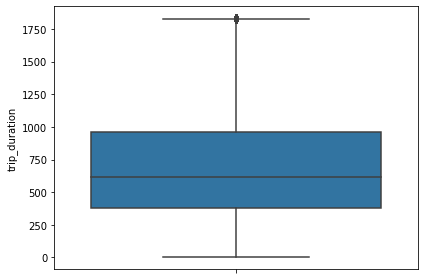

In [ ]:
sns.boxplot(y = df_outlier_dur['trip_duration'])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_dur, list_model)

<ipython-input-45-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.56655e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-45-e4

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  405.529547  329.912401  1.145527
1    Test       LinearRegression  406.389565  330.310057  1.170013
2   Train                  Ridge  405.529551  329.914932  1.145526
3    Test                  Ridge  406.388135  330.312474  1.170012
4   Train                  Lasso  407.583965  332.890718  1.137623
5    Test                  Lasso  407.991963  333.316340  1.161480
6   Train  DecisionTreeRegressor    0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  305.142401  220.515233  0.524291


<ipython-input-45-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Combination

In [ ]:
column = df.columns

df_outlier_com = remove_outlier(df, column).reset_index()

min:  -0.5 max:  3.5
min:  -0.5 max:  3.5
min:  -74.02864456176758 max:  -73.93059158325195
min:  40.69478797912598 max:  40.81077003479004
min:  -74.03197097778323 max:  -73.9242134094238
min:  40.69003868103027 max:  40.81709861755371
min:  0.0 max:  0.0
min:  -455.0 max:  1745.0
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0


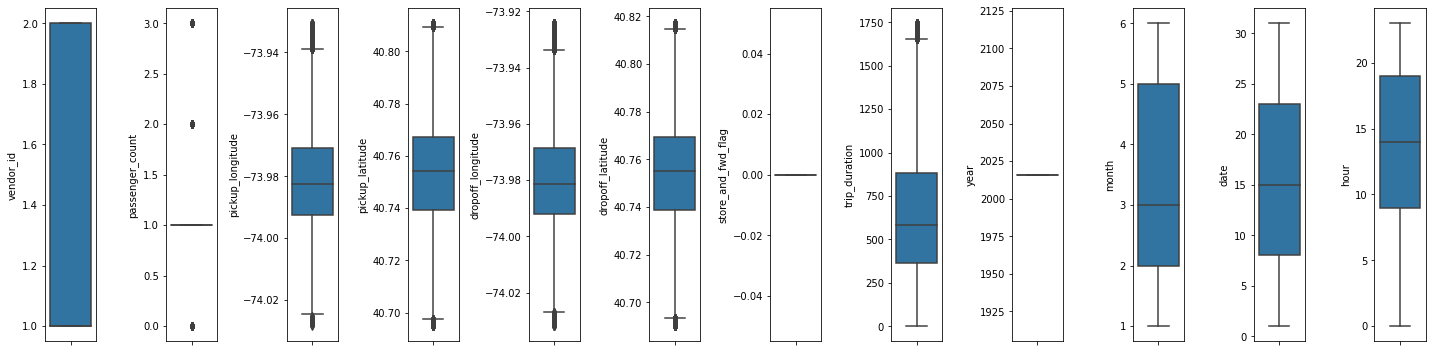

In [ ]:
fig, ax = plt.subplots(1, len(column), figsize = (20,5))
for i in range(0, len(column)): 
  sns.boxplot(y = df_outlier_com[column[i]], ax = ax[i])

plt.tight_layout();
plt.show();

In [ ]:
modeling(df_outlier_com, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.96402e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
<ipython-input-8-e42ce

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  366.879640  297.225757  0.973758
1    Test       LinearRegression  367.041197  297.667223  0.985286
2   Train                  Ridge  366.879820  297.228291  0.973788
3    Test                  Ridge  367.043682  297.671361  0.985318
4   Train                  Lasso  369.806929  299.978501  0.984565
5    Test                  Lasso  370.297723  300.634346  0.995624
6   Train  DecisionTreeRegressor    0.000000    0.000000  0.000000
7    Test  DecisionTreeRegressor  295.950728  214.497867  0.502666


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


### Scaling

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [20]:
def modeling_scaled(X_train, X_test, y_train, y_test, list_model):
  
  result = pd.DataFrame(columns = ['Dataset', 'Method','RMSE', 'MAE', 'MAPE'])

  for model in list_model:
      model.fit(X_train,y_train)
      y_pred = model.predict(X_train)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_train, y_pred))
      MAE = mean_absolute_error(y_train, y_pred)
      MAPE = mean_absolute_percentage_error(y_train, y_pred)
      
      result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

      y_pred = model.predict(X_test)
      
      method = str(type(model)).split('.')[-1][:-2]

      RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
      MAE = mean_absolute_error(y_test, y_pred)
      MAPE = mean_absolute_percentage_error(y_test, y_pred)

      result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)

  print(result)

#### Min Max Scaler

In [21]:
X = df.drop('trip_duration', axis=1)
y = df[['trip_duration']]

scaler = MinMaxScaler()
X_scale_minmax = scaler.fit_transform(X)

X_train_scale_minmax, X_test_scale_minmax, y_train, y_test = train_test_split(X_scale_minmax, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [22]:
modeling_scaled(X_train_scale_minmax, X_test_scale_minmax, y_train, y_test, list_model)

<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

   Dataset                     Method          RMSE         MAE      MAPE
0    Train           LinearRegression   5741.161874  608.574563  1.611008
1     Test           LinearRegression   3255.859990  609.504725  1.577714
2    Train                      Ridge   5741.603612  612.043306  1.605817
3     Test                      Ridge   3256.615551  612.771885  1.573903
4    Train                      Lasso   5745.263652  632.471194  1.590112
5     Test                      Lasso   3262.867629  633.354231  1.565644
6    Train      DecisionTreeRegressor      2.373182    0.012164  0.000025
7     Test      DecisionTreeRegressor  10172.783877  572.865781  0.837492
8    Train      RandomForestRegressor   2427.702119  172.861224  0.287685
9     Test      RandomForestRegressor   4559.462442  467.119004  0.768596
10   Train  GradientBoostingRegressor   5034.245112  466.556225  1.151540
11    Test  GradientBoostingRegressor   3628.037936  474.144192  1.155102


<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


#### Standard Scaler

In [ ]:
X = df.drop('trip_duration', axis=1)
y = df[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train_scale_stand, X_test_scale_stand, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [ ]:
modeling_scaled(X_train_scale_stand, X_test_scale_stand, y_train, y_test, list_model)

<ipython-input-14-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-14-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-14-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-14-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.161874  608.574563  1.611008
1    Test       LinearRegression  3255.859990  609.504725  1.577714
2   Train                  Ridge  5741.161874  608.574555  1.611008
3    Test                  Ridge  3255.859989  609.504717  1.577714
4   Train                  Lasso  5741.163168  608.458712  1.611005
5    Test                  Lasso  3255.845243  609.385125  1.577759
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  8342.784521  566.746741  0.856146


<ipython-input-14-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


### Drop Variable

#### Vendor ID

In [ ]:
df_drop_vendor = df.drop('vendor_id', axis=1)
modeling(df_drop_vendor, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.933934  603.938104  1.618774
1    Test       LinearRegression  3257.674864  605.066043  1.585933
2   Train                  Ridge  5741.933935  603.940463  1.618758
3    Test                  Ridge  3257.674536  605.068352  1.585924
4   Train                  Lasso  5742.174665  605.353529  1.613621
5    Test                  Lasso  3257.774206  606.335704  1.582508
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  7185.810628  586.066626  0.941749


#### Year

In [ ]:
df_drop_year = df.drop('year', axis=1)
modeling(df_drop_year, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.161874  608.574563  1.611008
1    Test       LinearRegression  3255.859990  609.504725  1.577714
2   Train                  Ridge  5741.161876  608.576775  1.610992
3    Test                  Ridge  3255.859668  609.506902  1.577703
4   Train                  Lasso  5741.413727  609.771625  1.605381
5    Test                  Lasso  3255.987561  610.577245  1.573743
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  8370.479532  571.499209  0.873443


#### Month

In [ ]:
df_drop_month = df.drop('month', axis=1)
modeling(df_drop_month, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method          RMSE         MAE      MAPE
0   Train       LinearRegression   5741.257923  609.403206  1.612620
1    Test       LinearRegression   3256.084065  610.365589  1.579567
2   Train                  Ridge   5741.257924  609.405386  1.612604
3    Test                  Ridge   3256.083741  610.367663  1.579556
4   Train                  Lasso   5741.509732  610.574881  1.606990
5    Test                  Lasso   3256.210205  611.422908  1.575579
6   Train  DecisionTreeRegressor      2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  11755.337875  593.161922  0.896938


#### Date

In [ ]:
df_drop_date = df.drop('date', axis=1)
modeling(df_drop_date, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method          RMSE         MAE      MAPE
0   Train       LinearRegression   5741.161903  608.569194  1.611003
1    Test       LinearRegression   3255.857994  609.500961  1.577718
2   Train                  Ridge   5741.161904  608.571413  1.610986
3    Test                  Ridge   3255.857674  609.503140  1.577707
4   Train                  Lasso   5741.413746  609.769501  1.605379
5    Test                  Lasso   3255.986751  610.575520  1.573745
6   Train  DecisionTreeRegressor      2.438899    0.013635  0.000031
7    Test  DecisionTreeRegressor  10172.261527  573.075351  0.903932


#### Hour

In [ ]:
df_drop_hour = df.drop('hour', axis=1)
modeling(df_drop_hour, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.195515  608.783683  1.613639
1    Test       LinearRegression  3255.870481  609.713105  1.580392
2   Train                  Ridge  5741.195516  608.785940  1.613623
3    Test                  Ridge  3255.870148  609.715324  1.580381
4   Train                  Lasso  5741.447140  610.006649  1.608216
5    Test                  Lasso  3255.994706  610.824345  1.576711
6   Train  DecisionTreeRegressor     6.167444    0.073787  0.000217
7    Test  DecisionTreeRegressor  7592.972549  618.416708  0.938691


#### Number of Passenger

In [ ]:
df_drop_passenger = df.drop('passenger_count', axis=1)
modeling(df_drop_passenger, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.171452  608.617841  1.612184
1    Test       LinearRegression  3255.913057  609.538072  1.578734
2   Train                  Ridge  5741.171453  608.620048  1.612167
3    Test                  Ridge  3255.912737  609.540233  1.578723
4   Train                  Lasso  5741.423306  609.811685  1.606573
5    Test                  Lasso  3256.040441  610.608529  1.574775
6   Train  DecisionTreeRegressor     2.426409    0.013034  0.000027
7    Test  DecisionTreeRegressor  8303.310686  558.342757  0.863028


#### Pickup Longitude

In [ ]:
df_drop_plong = df.drop('pickup_longitude', axis=1)
modeling(df_drop_plong, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5742.251725  613.897192  1.611059
1    Test       LinearRegression  3257.485305  614.453882  1.577424
2   Train                  Ridge  5742.251726  613.899518  1.611038
3    Test                  Ridge  3257.485486  614.456352  1.577411
4   Train                  Lasso  5742.392089  616.187389  1.603135
5    Test                  Lasso  3257.934213  616.786859  1.571941
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  6054.687529  643.091887  1.252629


#### Pickup Latitude

In [ ]:
df_drop_plat = df.drop('pickup_latitude', axis=1)
modeling(df_drop_plat, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method          RMSE         MAE      MAPE
0   Train       LinearRegression   5742.181191  614.913968  1.608193
1    Test       LinearRegression   3257.289078  615.967980  1.578592
2   Train                  Ridge   5742.181192  614.913884  1.608177
3    Test                  Ridge   3257.288609  615.967651  1.578580
4   Train                  Lasso   5742.419008  614.991286  1.603157
5    Test                  Lasso   3257.350669  615.933425  1.574297
6   Train  DecisionTreeRegressor      2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  11823.738753  697.276952  1.243797


#### Drop off Longitude

In [ ]:
df_drop_dlong = df.drop('dropoff_longitude', axis=1)
modeling(df_drop_dlong, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.288730  607.523507  1.612656
1    Test       LinearRegression  3255.562722  608.332876  1.578687
2   Train                  Ridge  5741.288731  607.526796  1.612638
3    Test                  Ridge  3255.562858  608.336222  1.578676
4   Train                  Lasso  5741.422548  609.753623  1.605455
5    Test                  Lasso  3255.985076  610.554514  1.573795
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  6908.851101  661.929883  1.255759


#### Drop off Latitude

In [ ]:
df_drop_dlat = df.drop('dropoff_latitude', axis=1)
modeling(df_drop_dlat, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.403948  610.450315  1.606879
1    Test       LinearRegression  3256.282453  611.301010  1.575227
2   Train                  Ridge  5741.403949  610.453420  1.606861
3    Test                  Ridge  3256.282272  611.304077  1.575216
4   Train                  Lasso  5741.630323  611.547709  1.603522
5    Test                  Lasso  3256.397566  612.313772  1.572848
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  8409.677082  687.402322  1.243700


#### Store and Fwd Flag

In [ ]:
df_drop_store = df.drop('store_and_fwd_flag', axis=1)
modeling(df_drop_store, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.179555  608.673454  1.610183
1    Test       LinearRegression  3255.891583  609.595520  1.576686
2   Train                  Ridge  5741.179556  608.675677  1.610167
3    Test                  Ridge  3255.891263  609.597690  1.576675
4   Train                  Lasso  5741.416324  609.786891  1.605326
5    Test                  Lasso  3255.992143  610.590945  1.573671
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  8366.580666  571.345125  0.867336


#### Combination

In [ ]:
df_drop_com = df.drop(['passenger_count', 'store_and_fwd_flag'], axis=1)
modeling(df_drop_com, list_model)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.189156  608.716661  1.611360
1    Test       LinearRegression  3255.944774  609.629033  1.577706
2   Train                  Ridge  5741.189157  608.718873  1.611343
3    Test                  Ridge  3255.944456  609.631197  1.577696
4   Train                  Lasso  5741.425927  609.827083  1.606518
5    Test                  Lasso  3256.045071  610.622353  1.574701
6   Train  DecisionTreeRegressor     2.426409    0.013034  0.000027
7    Test  DecisionTreeRegressor  8355.284315  567.637879  0.922603


### Feature Engineering

### Distance

In [ ]:
df_new = df.copy()

In [ ]:
from math import sin, cos, sqrt, atan2, radians

# Approximate radius of earth in km
def distance(lat1, lon1, lat2, lon2):
  R = 6371.0

  lat1 = radians(52.2296756)
  lon1 = radians(21.0122287)
  lat2 = radians(52.406374)
  lon2 = radians(16.9251681)

  dlon = lon2 - lon1
  dlat = lat2 - lat1

  a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  distance = R * c

  return distance

df_new['distance'] = distance(lat1=['pickup_latitude'], lon1=['pickup_longitude'], lat2=['dropoff_latitude'], lon2=['dropoff_longitude'])

In [ ]:
modeling(df_new, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'M

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.161874  608.574563  1.611008
1    Test       LinearRegression  3255.859990  609.504725  1.577714
2   Train                  Ridge  5741.161876  608.576775  1.610992
3    Test                  Ridge  3255.859668  609.506902  1.577703
4   Train                  Lasso  5741.413727  609.771625  1.605381
5    Test                  Lasso  3255.987561  610.577245  1.573743
6   Train  DecisionTreeRegressor     2.373182    0.012164  0.000025
7    Test  DecisionTreeRegressor  8367.231530  571.267931  0.913300


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_new_drop = df_new.drop(['dropoff_latitude', 'dropoff_longitude'], axis=1)

In [ ]:
modeling(df_new_drop, list_model)

<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-8-e42ced40f67b>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'M

  Dataset                 Method         RMSE         MAE      MAPE
0   Train       LinearRegression  5741.524065  609.798188  1.608955
1    Test       LinearRegression  3256.026631  610.579179  1.576662
2   Train                  Ridge  5741.524067  609.801906  1.608936
3    Test                  Ridge  3256.026806  610.582935  1.576650
4   Train                  Lasso  5741.634534  611.543351  1.603565
5    Test                  Lasso  3256.396561  612.307884  1.572880
6   Train  DecisionTreeRegressor     4.149408    0.019934  0.000035
7    Test  DecisionTreeRegressor  7670.556462  851.335213  1.907563


<ipython-input-8-e42ced40f67b>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


### Combination

1. Remove trip duration outlier
2. Scaling standard
3. Drop passenger

In [ ]:
df_combi = df.copy()

In [ ]:
df_combi = df_combi.drop(['passenger_count'], axis=1)
column = df_combi.columns
df_combi = remove_outlier(df_combi, column)

min:  -0.5 max:  3.5
min:  -74.02867126464847 max:  -73.93052673339841
min:  40.69478416442871 max:  40.81076622009277
min:  -74.031967163086 max:  -73.92424011230463
min:  40.69005203247069 max:  40.81709671020509
min:  0.0 max:  0.0
min:  -454.0 max:  1746.0
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0


In [ ]:
X = df_combi.drop(['trip_duration'], axis=1)
y = df_combi[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train_combi, X_test_combi, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [ ]:
modeling_scaled(X_train_combi, X_test_combi, y_train, y_test, list_model)

<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  367.170643  297.628403  0.959786
1    Test       LinearRegression  366.894248  297.187767  0.966155
2   Train                  Ridge  367.170643  297.628404  0.959786
3    Test                  Ridge  366.894248  297.187768  0.966155
4   Train                  Lasso  367.186637  297.685261  0.960268
5    Test                  Lasso  366.906779  297.242169  0.966692
6   Train  DecisionTreeRegressor    1.440179    0.007047  0.000021
7    Test  DecisionTreeRegressor  293.143554  212.015505  0.486707


<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_combi = remove_outlier(df_combi, column)

min:  -0.5 max:  3.5
min:  -74.02462005615237 max:  -73.93886566162107
min:  40.69740104675293 max:  40.80920219421387
min:  -74.0266914367676 max:  -73.93425369262692
min:  40.69370079040526 max:  40.8142604827881
min:  0.0 max:  0.0
min:  -406.5 max:  1645.5
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0


In [ ]:
X = df_combi.drop(['trip_duration'], axis=1)
y = df_combi[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train_combi, X_test_combi, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [ ]:
modeling_scaled(X_train_combi, X_test_combi, y_train, y_test, list_model)

<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  352.977535  287.533310  0.939655
1    Test       LinearRegression  353.567336  287.914034  0.924512
2   Train                  Ridge  352.977535  287.533311  0.939655
3    Test                  Ridge  353.567337  287.914035  0.924512
4   Train                  Lasso  352.994808  287.587480  0.940138
5    Test                  Lasso  353.580884  287.968498  0.925004
6   Train  DecisionTreeRegressor    1.241391    0.005060  0.000013
7    Test  DecisionTreeRegressor  284.396499  206.866257  0.476621


<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [ ]:
df_combi = remove_outlier(df_combi, column)

min:  -0.5 max:  3.5
min:  -74.0242691040039 max:  -73.93949127197266
min:  40.69778442382815 max:  40.80889892578122
min:  -74.02617645263675 max:  -73.93523406982419
min:  40.694309234619126 max:  40.813816070556655
min:  0.0 max:  0.0
min:  -393.5 max:  1618.5
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0


In [ ]:
X = df_combi.drop(['trip_duration'], axis=1)
y = df_combi[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train_combi, X_test_combi, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [ ]:
modeling_scaled(X_train_combi, X_test_combi, y_train, y_test, list_model)

<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

  Dataset                 Method        RMSE         MAE      MAPE
0   Train       LinearRegression  349.563362  285.205477  0.931350
1    Test       LinearRegression  348.866822  284.560642  0.932634
2   Train                  Ridge  349.563362  285.205478  0.931350
3    Test                  Ridge  348.866822  284.560643  0.932634
4   Train                  Lasso  349.580853  285.260459  0.931812
5    Test                  Lasso  348.892729  284.619844  0.933169
6   Train  DecisionTreeRegressor    1.194422    0.005853  0.000023
7    Test  DecisionTreeRegressor  281.864025  205.399372  0.484626


<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


### Combination 2

In [23]:
df_combi2 = df.copy()

df_combi2 = df_combi2.drop(['passenger_count'], axis=1)
column = df_combi2.columns
df_combi2 = remove_outlier(df_combi2, column)
df_combi2 = remove_outlier(df_combi2, column)
df_combi2 = remove_outlier(df_combi2, ['trip_duration'])

min:  -0.5 max:  3.5
min:  -74.02867126464847 max:  -73.93052673339841
min:  40.69478416442871 max:  40.81076622009277
min:  -74.031967163086 max:  -73.92424011230463
min:  40.69005203247069 max:  40.81709671020509
min:  0.0 max:  0.0
min:  -454.0 max:  1746.0
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0
min:  -0.5 max:  3.5
min:  -74.02462005615237 max:  -73.93886566162107
min:  40.69740104675293 max:  40.80920219421387
min:  -74.0266914367676 max:  -73.93425369262692
min:  40.69370079040526 max:  40.8142604827881
min:  0.0 max:  0.0
min:  -406.5 max:  1645.5
min:  2016.0 max:  2016.0
min:  -2.5 max:  9.5
min:  -14.5 max:  45.5
min:  -6.0 max:  34.0
min:  -395.0 max:  1621.0


In [24]:
X = df_combi2.drop(['trip_duration'], axis=1)
y = df_combi2[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train_combi, X_test_combi, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [25]:
modeling_scaled(X_train_combi, X_test_combi, y_train, y_test, list_model)

<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

   Dataset                     Method        RMSE         MAE      MAPE
0    Train           LinearRegression  350.026961  285.546486  0.936573
1     Test           LinearRegression  349.612549  285.311591  0.922868
2    Train                      Ridge  350.026961  285.546487  0.936573
3     Test                      Ridge  349.612549  285.311592  0.922868
4    Train                      Lasso  350.044374  285.600510  0.937057
5     Test                      Lasso  349.635064  285.373516  0.923355
6    Train      DecisionTreeRegressor    1.096226    0.005819  0.000015
7     Test      DecisionTreeRegressor  282.206623  205.702403  0.473947
8    Train      RandomForestRegressor   73.872369   54.270909  0.140127
9     Test      RandomForestRegressor  197.220629  145.963078  0.370625
10   Train  GradientBoostingRegressor  273.307641  216.437077  0.707218
11    Test  GradientBoostingRegressor  273.250532  216.437079  0.695280


<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


In [26]:
df_combi2 = remove_outlier(df_combi2, ['trip_duration'])

min:  -390.5 max:  1613.5


In [27]:
X = df_combi2.drop(['trip_duration'], axis=1)
y = df_combi2[['trip_duration']]

scaler = StandardScaler()
X_scale_stand = scaler.fit_transform(X)

X_train_combi, X_test_combi, y_train, y_test = train_test_split(X_scale_stand, y, test_size=0.25, random_state=42)

y_train = y_train.to_numpy()
y_train = y_train.reshape(len(y_train),)

In [28]:
modeling_scaled(X_train_combi, X_test_combi, y_train, y_test, list_model)

<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Train', 'Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)
<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pan

   Dataset                     Method        RMSE         MAE      MAPE
0    Train           LinearRegression  348.637078  284.665083  0.927305
1     Test           LinearRegression  349.324516  284.855795  0.945751
2    Train                      Ridge  348.637078  284.665084  0.927305
3     Test                      Ridge  349.324516  284.855796  0.945751
4    Train                      Lasso  348.654586  284.720072  0.927770
5     Test                      Lasso  349.346577  284.917054  0.946312
6    Train      DecisionTreeRegressor    1.277891    0.005917  0.000017
7     Test      DecisionTreeRegressor  280.526284  204.519835  0.478502
8    Train      RandomForestRegressor   73.691932   54.196200  0.139362
9     Test      RandomForestRegressor  196.546676  145.633735  0.381147
10   Train  GradientBoostingRegressor  272.647586  216.076833  0.701386
11    Test  GradientBoostingRegressor  273.558508  216.707655  0.715385


<ipython-input-20-516523d9c4ae>:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Dataset': 'Test','Method': method, 'RMSE' : RMSE, 'MAE': MAE, 'MAPE' : MAPE}, ignore_index=True)


Model terbaik adalah dengan melakukan preprocessing data dengan:
1. Men-drop variable passenger
2. Membuang outlier pada seluruh variable sebanyak 2 kali
3. Khusus untuk variable target yaitu trip_duration, dilakukan pembuangan outlier sebanyak 3 kali
4. Scaling seluruh feature menggunakan standar scaling

Dengan melakukan preprocessing data, didapatkan model Decision Tree Regressor memiliki RMSE = 281 dan MAE = 204. Model ini dapat dikatakan telah baik karena memiliki RMSE dan MAE yang tidak bergitu jauh yang memberikan indikasi bahwa hasil nilai prediksi target tidak terdapat outlier (nilai yang diprediksi terlalu jauh). Selain it, niali MAE = 204 memiliki arti bahwa error dari trip duration adalah 204s atau 3.4 menit dimana nilai tersebut cukup kecil.
